<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_05_python_Oksana_Maryshchyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# O1NAEX Exercise 05

##	Problem 6.1
from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An engineer is interested in the effects of cutting
speed (A), tool geometry (B), and cutting angle (C) on the life
(in hours) of a machine tool. Two levels of each factor are
chosen, and three replicates of a 23 factorial design are run.
The results are as follows:

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols




data = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_1.txt", sep=";")
data.head()

,CuttingSpeed,ToolGeometry,CuttingAngle,LifeHours
0,-1,-1,-1,22
1,-1,-1,-1,31
2,-1,-1,-1,25
3,1,-1,-1,32
4,1,-1,-1,43


\
1. Estimate the factor effects. Which effects appear to be
large?
2. Use the analysis of variance to confirm your conclusions
for part (a).Examine the interaction effects between cutting speed (A) and tool geometry (B). How do these interactions influence tool life compared to the main effects?
3. Write down a regression model for predicting tool life
(in hours) based on the results of this experiment.
4. Analyze the residuals. Are there any obvious problems?
5. On the basis of an analysis of main effect and interaction
plots, what coded factor levels of A, B, and C
would you recommend using?
6. Reconsider task 3. Use the regression
model to generate response surface and contour plots of the
tool life response. Interpret these plots. Do they provide insight
regarding the desirable operating conditions for this process?
7. Find the standard error of the factor effects and
approximate 95 percent confidence limits for the factor effects. Do the results of this analysis agree with the conclusions from the analysis of variance?
8. Given the results from your analysis of variance and the regression model, what specific settings for cutting speed (A), tool geometry (B), and cutting angle (C) would you recommend for maximizing tool life? Justify your recommendations with supporting data.
9. Conduct a sensitivity analysis to determine how changes in each factor (A, B, and C) impact the variability of tool life. Which factor has the most significant effect on tool life variability, and how might this influence future experimental designs?



1. Estimate the factor effects. Which effects appear to be large?

In [ ]:
# high low levels
a = data[(data['CuttingSpeed'] == 1) & (data['ToolGeometry'] == -1) & (data['CuttingAngle'] == -1)]['LifeHours'].sum()
ab = data[(data['CuttingSpeed'] == 1) & (data['ToolGeometry'] == 1) & (data['CuttingAngle'] == -1)]['LifeHours'].sum()
ac = data[(data['CuttingSpeed'] == 1) & (data['ToolGeometry'] == -1) & (data['CuttingAngle'] == 1)]['LifeHours'].sum()
abc = data[(data['CuttingSpeed'] == 1) & (data['ToolGeometry'] == 1) & (data['CuttingAngle'] == 1)]['LifeHours'].sum()

b = data[(data['CuttingSpeed'] == -1) & (data['ToolGeometry'] == 1) & (data['CuttingAngle'] == -1)]['LifeHours'].sum()
c = data[(data['CuttingSpeed'] == -1) & (data['ToolGeometry'] == -1) & (data['CuttingAngle'] == 1)]['LifeHours'].sum()
bc = data[(data['CuttingSpeed'] == -1) & (data['ToolGeometry'] == 1) & (data['CuttingAngle'] == 1)]['LifeHours'].sum()

one1 = data[(data['CuttingSpeed'] == -1) & (data['ToolGeometry'] == -1) & (data['CuttingAngle'] == -1)]['LifeHours'].sum()

# replicates
n = 3
const= 1 / (4 * n)


effect_A =  const* (a + ab + ac + abc - b - c-bc - one1)
effect_B = const * (b+ ab + bc + abc - a - c-ac - one1)
effect_C = const * (c + ac + bc + abc - a - b-ab - one1)
interaction_AB = const * (abc +ab +c+one1-a-b-ac-bc)
interaction_AC = const * (abc +ac +b+one1-a-c-ab-bc)
interaction_BC= const * (abc +bc +a+one1-b-c-ab-ac)
interaction_ABC= const * (abc +a +b+c-ab-ac-bc-one1)





print(f"Main Effect of A: {effect_A}")
print(f"Main Effect of B: {effect_B}")
print(f"Main Effect of C: {effect_C}")
print(f"Interaction AB: {interaction_AB}")
print(f"Interaction AC: {interaction_AC}")
print(f"Interaction BC: {interaction_BC}")
print(f"Interaction ABC: {interaction_ABC}")






Main Effect of A: 0.3333333333333333
Main Effect of B: 11.333333333333332
Main Effect of C: 6.833333333333333
Interaction AB: -1.6666666666666665
Interaction AC: -8.833333333333332
Interaction BC: -2.833333333333333
Interaction ABC: -2.1666666666666665


The effects of B,C, and AC interaction look like to be most significant.

2. Use the analysis of variance to confirm your conclusions
for part (a).Examine the interaction effects between cutting speed (A) and tool geometry (B). How do these interactions influence tool life compared to the main effects?

In [ ]:
model = ols('LifeHours ~ CuttingSpeed * ToolGeometry * CuttingAngle', data=data).fit()

anova_results = sm.stats.anova_lm(model, typ=2)

anova_results['MSE'] = anova_results['sum_sq'] / anova_results['df']

print(anova_results)


                                            sum_sq    df          F    PR(>F)  \
CuttingSpeed                              0.666667   1.0   0.022099  0.883680   
ToolGeometry                            770.666667   1.0  25.546961  0.000117   
CuttingSpeed:ToolGeometry                16.666667   1.0   0.552486  0.468078   
CuttingAngle                            280.166667   1.0   9.287293  0.007679   
CuttingSpeed:CuttingAngle               468.166667   1.0  15.519337  0.001172   
ToolGeometry:CuttingAngle                48.166667   1.0   1.596685  0.224475   
CuttingSpeed:ToolGeometry:CuttingAngle   28.166667   1.0   0.933702  0.348282   
Residual                                482.666667  16.0        NaN       NaN   

                                               MSE  
CuttingSpeed                              0.666667  
ToolGeometry                            770.666667  
CuttingSpeed:ToolGeometry                16.666667  
CuttingAngle                            280.166667  
Cutti

Effects of main factors such as tool geometry and cutting angle appear to be significant. Then interaction terms involving cutting speed and cutting angle.  
The interaction term CuttingSpeed:ToolGeometry does not appear significant.


3. Write down a regression model for predicting tool life (in hours) based on the results of this experiment.

We will keep factors that appeared to be significant in previous step.

In [ ]:
model_1 = ols('LifeHours ~ CuttingAngle*CuttingSpeed+ToolGeometry ', data=data).fit()
anova_results1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_results1)

                               sum_sq    df          F    PR(>F)
CuttingAngle               280.166667   1.0   9.246960  0.006724
CuttingSpeed                 0.666667   1.0   0.022003  0.883641
CuttingAngle:CuttingSpeed  468.166667   1.0  15.451940  0.000897
ToolGeometry               770.666667   1.0  25.436016  0.000072
Residual                   575.666667  19.0        NaN       NaN


4. Analyze the residuals. Are there any obvious problems?

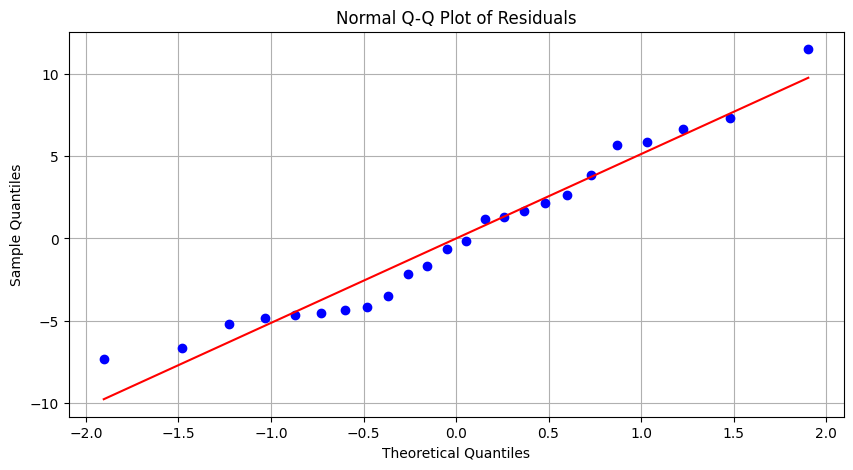

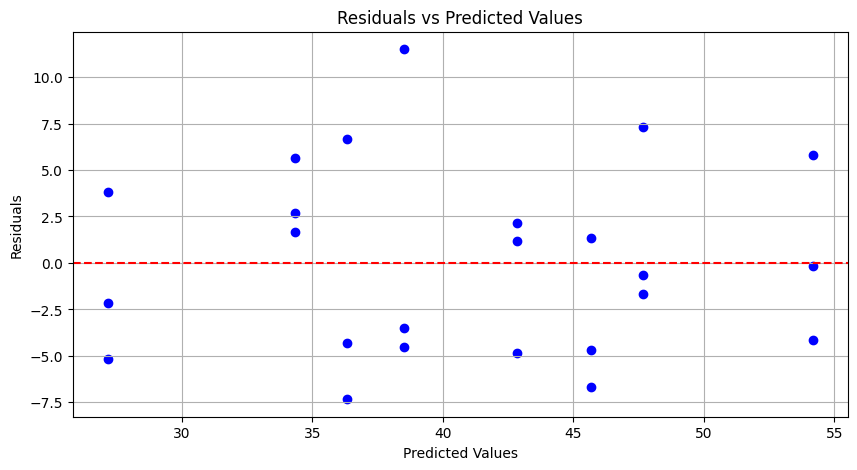

In [ ]:
residuals = model_1.resid
predicted = model_1.fittedvalues

plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(predicted, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

Normality

In [ ]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=0.953001502595568, pvalue=0.31429112905947953)

Homoscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model_1.model.exog)
print("Test Statistic:", bp_test[0])
print("p-value:", bp_test[1])

Test Statistic: 2.8293410288929266
p-value: 0.5867786192295982


There appears to be no problem in residuals.

5. On the basis of an analysis of main effect and interaction
plots, what coded factor levels of A, B, and C
would you recommend using?

We will plot main effect factors first:

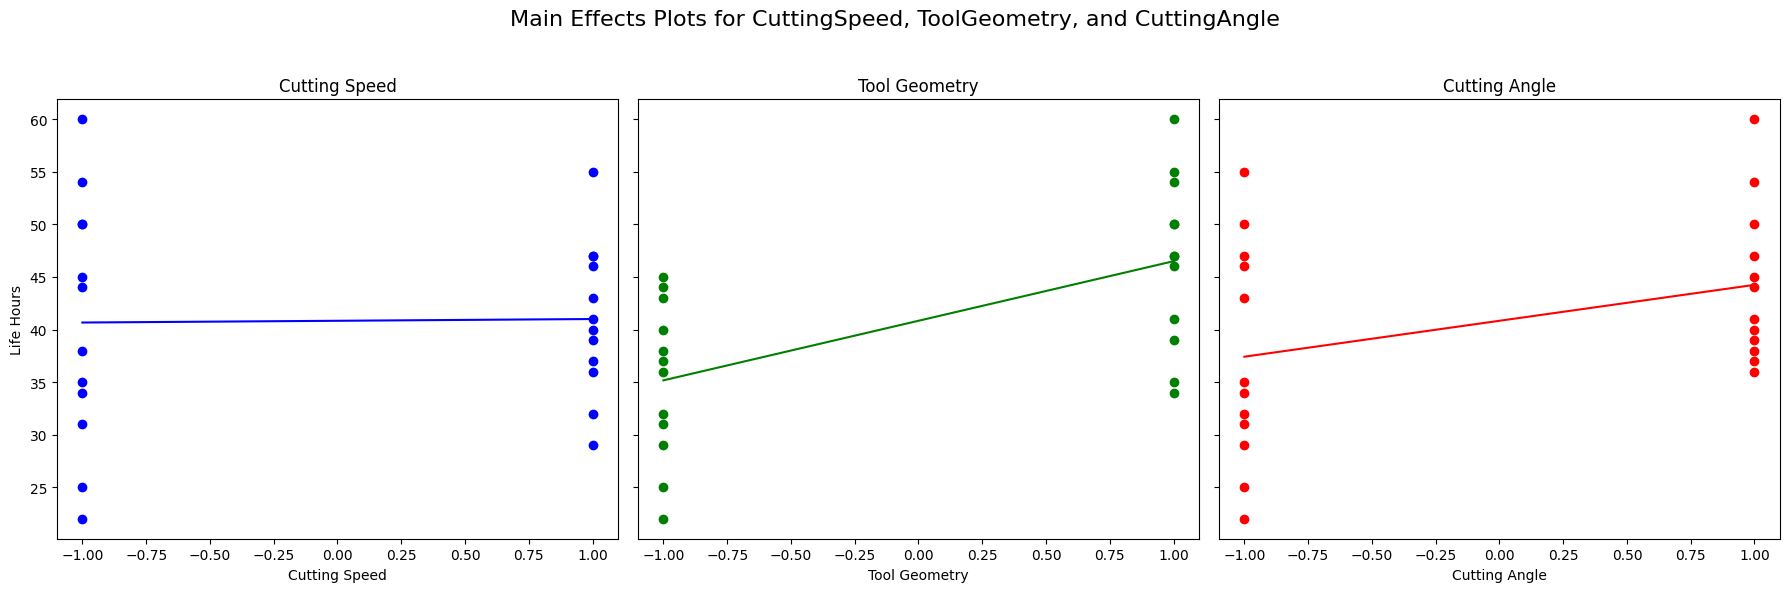

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Main Effects Plots for CuttingSpeed, ToolGeometry, and CuttingAngle", fontsize=16)

axes[0].scatter(data['CuttingSpeed'], data['LifeHours'], color='b')
axes[0].plot(data.groupby('CuttingSpeed')['LifeHours'].mean().index, data.groupby('CuttingSpeed')['LifeHours'].mean(), color='b')
axes[0].set_title("Cutting Speed")
axes[0].set_xlabel("Cutting Speed")
axes[0].set_ylabel("Life Hours")

axes[1].scatter(data['ToolGeometry'], data['LifeHours'], color='g')
axes[1].plot(data.groupby('ToolGeometry')['LifeHours'].mean().index, data.groupby('ToolGeometry')['LifeHours'].mean(), color='g')
axes[1].set_title("Tool Geometry")
axes[1].set_xlabel("Tool Geometry")

axes[2].scatter(data['CuttingAngle'], data['LifeHours'], color='r')
axes[2].plot(data.groupby('CuttingAngle')['LifeHours'].mean().index, data.groupby('CuttingAngle')['LifeHours'].mean(), color='r')
axes[2].set_title("Cutting Angle")
axes[2].set_xlabel("Cutting Angle")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Tool Geometry level change has the most positive effect on Life Hours.

Now interaction plots:

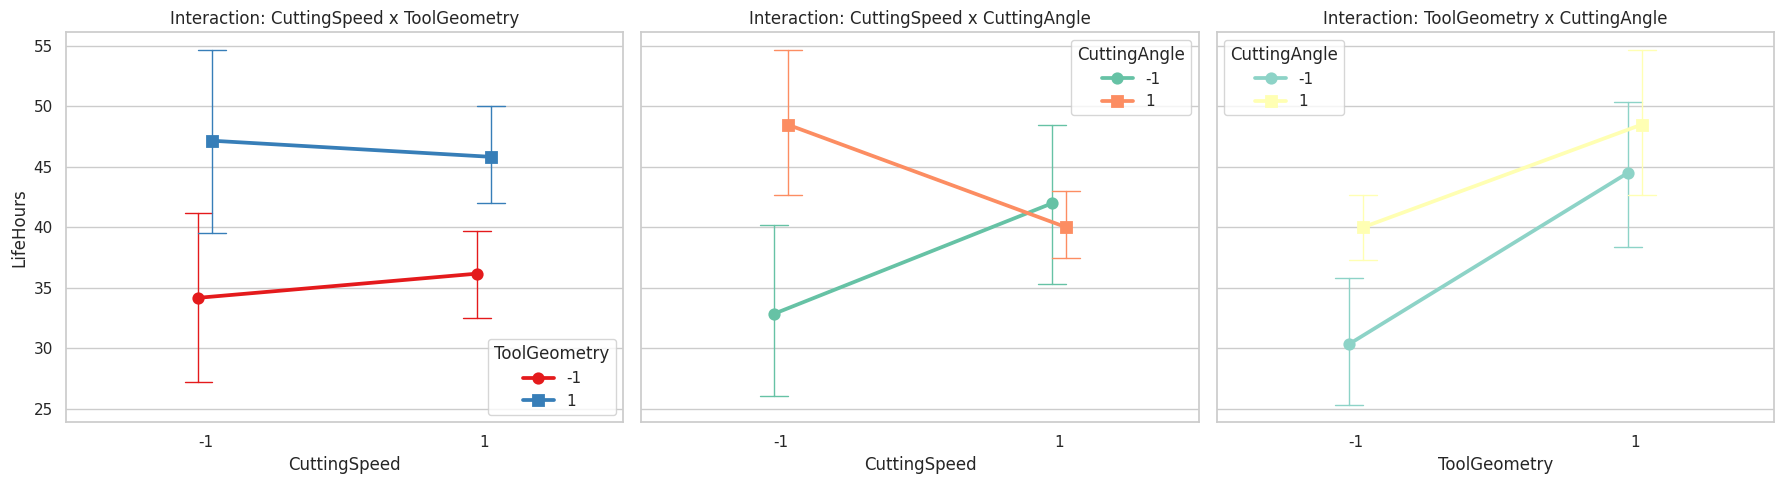

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.pointplot(
    data=data, x='CuttingSpeed', y='LifeHours', hue='ToolGeometry',
    dodge=True, markers=["o", "s"], capsize=.1, err_kws={'linewidth': 1}, palette="Set1", ax=axes[0]
)
axes[0].set_title("Interaction: CuttingSpeed x ToolGeometry")
axes[0].set_ylabel("LifeHours")

sns.pointplot(
    data=data, x='CuttingSpeed', y='LifeHours', hue='CuttingAngle',
    dodge=True, markers=["o", "s"], capsize=.1,err_kws={'linewidth': 1}, palette="Set2", ax=axes[1]
)
axes[1].set_title("Interaction: CuttingSpeed x CuttingAngle")
axes[1].set_ylabel("LifeHours")

sns.pointplot(
    data=data, x='ToolGeometry', y='LifeHours', hue='CuttingAngle',
    dodge=True, markers=["o", "s"], capsize=.1, err_kws={'linewidth': 1}, palette="Set3", ax=axes[2]
)
axes[2].set_title("Interaction: ToolGeometry x CuttingAngle")
axes[2].set_ylabel("LifeHours")

plt.tight_layout()
plt.show()

From main effect plot we would suggest to set **Tool Geometry at high level +1**, then from interaction plots **Cutting Speed is better to set at low level -1** and **Cutting Angle at +1**.

6. Reconsider task 3. Use the regression model to generate response surface and contour plots of the tool life response. Interpret these plots. Do they provide insight regarding the desirable operating conditions for this process?

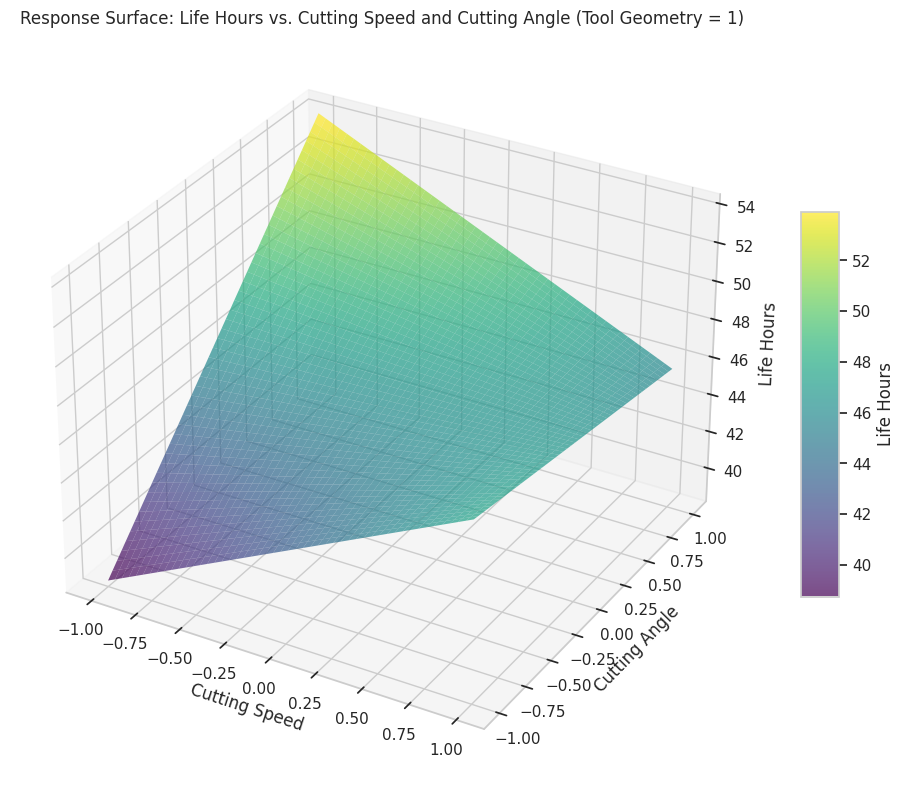

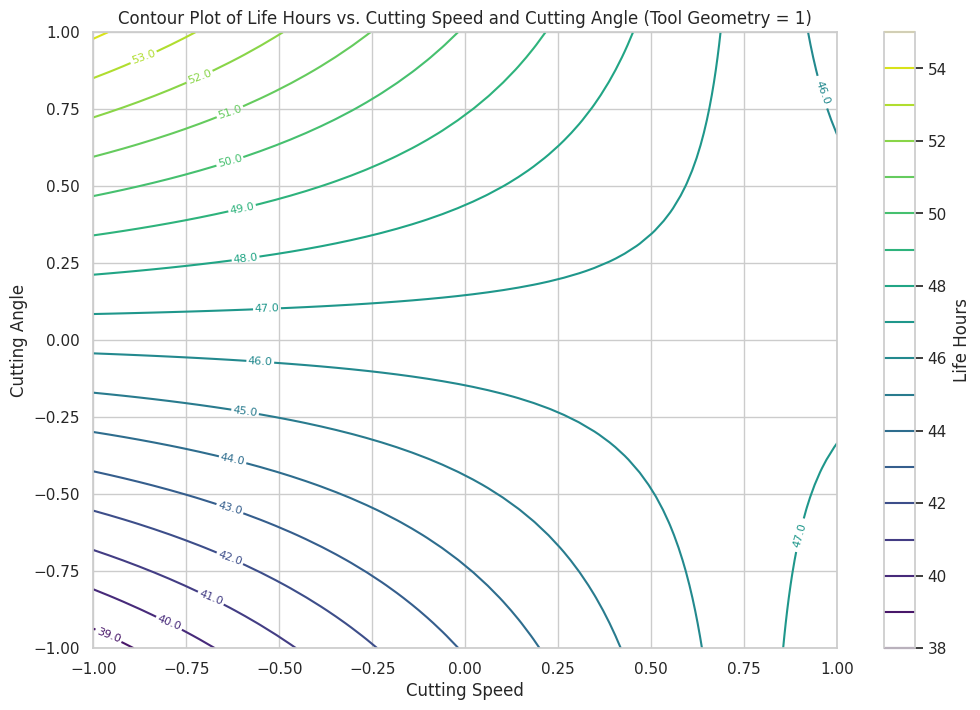

In [ ]:
model_1 = ols('LifeHours ~ CuttingAngle * CuttingSpeed + ToolGeometry', data=data).fit()

# Create a grid for CuttingSpeed and CuttingAngle
cutting_speed_range = np.linspace(-1, 1, 50)  # Range from -1 to 1
cutting_angle_range = np.linspace(-1, 1, 50)  # Range from -1 to 1

# Create a data frame for predictions
prediction_grid = pd.DataFrame(np.array(np.meshgrid(cutting_speed_range, cutting_angle_range)).T.reshape(-1, 2), columns=['CuttingSpeed', 'CuttingAngle'])
prediction_grid['ToolGeometry'] = 1

# Predict LifeHours using the model
prediction_grid['LifeHours'] = model_1.predict(prediction_grid)

# Reshape the predictions for plotting using pivot_table
z_matrix = prediction_grid.pivot_table(index='CuttingAngle', columns='CuttingSpeed', values='LifeHours')

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for surface
X, Y = np.meshgrid(cutting_speed_range, cutting_angle_range)

# Plot the surface
surf = ax.plot_surface(X, Y, z_matrix, cmap='viridis', edgecolor='none', alpha=0.7)

# Add a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Life Hours')  # Label for the color bar

ax.set_xlabel('Cutting Speed')
ax.set_ylabel('Cutting Angle')
ax.set_zlabel('Life Hours')
ax.set_title('Response Surface: Life Hours vs. Cutting Speed and Cutting Angle (Tool Geometry = 1)')
plt.show()

# contour plot
plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, z_matrix, levels=15, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')  # Annotate contour lines with values

plt.title('Contour Plot of Life Hours vs. Cutting Speed and Cutting Angle (Tool Geometry = 1)')
plt.xlabel('Cutting Speed')
plt.ylabel('Cutting Angle')
plt.colorbar(label='Life Hours')

plt.show()


Here we keep B (Tool Geometry at +1). Above results agree with our suggestion of factors setting : Cutting speed -1, Cutting angle 1.

7. Find the standard error of the factor effects and approximate 95 percent confidence limits for the factor effects. Do the results of this analysis agree with the conclusions from the analysis of variance?

In [ ]:
residual_mse_value = anova_results.loc['Residual', 'MSE']
standard_effect=np.sqrt(residual_mse_value/16)
print("standard_effect is", standard_effect)

standard_effect is 1.37310475444034


effects of factors:

In [ ]:
residual_mse_value = anova_results.loc['Residual', 'MSE']
standard_effect=np.sqrt(residual_mse_value/16)
print("standard_effect is", standard_effect)


cuttingAngleMse=anova_results.loc['CuttingAngle', 'MSE']
CuttingSpeedMse=anova_results.loc['CuttingSpeed', 'MSE']
CuttingSpeed_CuttingAngleMse= anova_results.loc['CuttingSpeed:CuttingAngle', 'MSE']

cuttingAngleStdError=np.sqrt(cuttingAngleMse/16)
cuttingSpeedStdError=np.sqrt(CuttingSpeedMse/16)
cuttingSpeed_CuttingAngleStdError=np.sqrt(CuttingSpeed_CuttingAngleMse/16)

print("Angle effect is", cuttingAngleStdError)
print("Speed effect is", cuttingSpeedStdError)
print("CuttingSpeed_CuttingAngle effect is", cuttingSpeedStdError)


cuttingAngleEffect = model.params['CuttingAngle']
cuttingSpeedEffect = model.params['CuttingSpeed']
cuttingSpeed_CuttingAngleEffect = model.params['CuttingSpeed:CuttingAngle']

t_critical = stats.t.ppf(1 - 0.025, df=19)

cuttingAngleCI = (cuttingAngleEffect - t_critical * cuttingAngleStdError,
                  cuttingAngleEffect + t_critical * cuttingAngleStdError)
cuttingSpeedCI = (cuttingSpeedEffect - t_critical * cuttingSpeedStdError,
                  cuttingSpeedEffect + t_critical * cuttingSpeedStdError)
cuttingSpeed_CuttingAngleCI = (cuttingSpeed_CuttingAngleEffect - t_critical * cuttingSpeed_CuttingAngleStdError,
                               cuttingSpeed_CuttingAngleEffect + t_critical * cuttingSpeed_CuttingAngleStdError)

print("95% Confidence Interval for Cutting Angle effect:", cuttingAngleCI)
print("95% Confidence Interval for Cutting Speed effect:", cuttingSpeedCI)
print("95% Confidence Interval for Cutting Speed and Cutting Angle interaction effect:", cuttingSpeed_CuttingAngleCI)









standard_effect is 1.37310475444034
Angle effect is 4.184544977254594
Speed effect is 0.2041241452319309
CuttingSpeed_CuttingAngle effect is 0.2041241452319309
95% Confidence Interval for Cutting Angle effect: (-5.341686627480476, 12.175019960813811)
95% Confidence Interval for Cutting Speed effect: (-0.26057007938929017, 0.5939034127226241)
95% Confidence Interval for Cutting Speed and Cutting Angle interaction effect: (-15.738440437149558, 6.905107103816226)


In [ ]:
# residual DF of the model_1 are 23-4=19
# alfa = 0,05; 0,05/2=0,025

'''
coef = model_1.params
t_critical = stats.t.ppf(1 - 0.025, df=19)

std_err = model_1.bse

confidence_intervals = pd.DataFrame({
    'Lower Limit': coef - t_critical * std_err,
    'Upper Limit': coef + t_critical * std_err
})

# Display the confidence intervals
print(confidence_intervals)
'''

                           Lower Limit  Upper Limit
Intercept                    38.481658    43.185009
CuttingAngle                  1.064991     5.768342
CuttingSpeed                 -2.185009     2.518342
CuttingAngle:CuttingSpeed    -6.768342    -2.064991
ToolGeometry                  3.314991     8.018342


8. Given the results from your analysis of variance and the regression model, what specific settings for cutting speed (A), tool geometry (B), and cutting angle (C) would you recommend for maximizing tool life? Justify your recommendations with supporting data.

I would set Tool Geometry and Cutting Angle at high levels and Cutting Speed at low level.

9. Conduct a sensitivity analysis to determine how changes in each factor (A, B, and C) impact the variability of tool life. Which factor has the most significant effect on tool life variability, and how might this influence future experimental designs?

In [ ]:
total_ss = anova_results['sum_sq'].sum()
anova_results['percentage_contribution'] = (anova_results['sum_sq'] / total_ss) * 100
print(anova_results[['sum_sq', 'percentage_contribution']])

                                            sum_sq  percentage_contribution
CuttingSpeed                              0.666667                 0.031817
ToolGeometry                            770.666667                36.780146
CuttingSpeed:ToolGeometry                16.666667                 0.795418
CuttingAngle                            280.166667                13.370983
CuttingSpeed:CuttingAngle               468.166667                22.343303
ToolGeometry:CuttingAngle                48.166667                 2.298759
CuttingSpeed:ToolGeometry:CuttingAngle   28.166667                 1.344257
Residual                                482.666667                23.035317


In [ ]:
!pip install SALib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

# we create variable bounds for A, B, C
problem = {
    'num_vars': 3,
    'names': ['CuttingSpeed', 'ToolGeometry', 'CuttingAngle'],
    'bounds': [[-1, 1], [-1, 1], [-1, 1]]
}

#sample for Sobol analysis sugg. from py tutorial
param_values = saltelli.sample(problem, 1000)
def evaluate_model(params):
    df = pd.DataFrame(params, columns=problem['names'])
    df['ToolGeometry'] = 1
    predictions = model_1.predict(df)
    return predictions

#samples tool life
Y = np.array([evaluate_model([row]) for row in param_values])



<ipython-input-42-23a451e442a3>:15: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [ ]:
sobol_indices = sobol.analyze(problem, Y.flatten())
print("First-order Sobol indices (S1):", sobol_indices['S1'])
print("Total Sobol indices (ST):", sobol_indices['ST'])

First-order Sobol indices (S1): [0.00154747 0.         0.63497487]
Total Sobol indices (ST): [0.36006428 0.         0.99233637]


/usr/local/lib/python3.10/dist-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
